### Dependencies 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spstats
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Merged Data

In [2]:
df = pd.read_csv('df.csv')

Converting to datetime

In [3]:
df[['order_estimated_delivery_date','order_purchase_timestamp','review_creation_date','review_answer_timestamp','review_answer_timestamp','shipping_limit_date','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']] = df[['order_estimated_delivery_date','order_purchase_timestamp','review_creation_date','review_answer_timestamp','review_answer_timestamp','shipping_limit_date','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date']].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')


Rearraging Columns 

In [4]:
df = df.reindex(columns=['order_id', 'product_id', 'seller_id','customer_id', 'order_item_id','customer_unique_id', 'shipping_limit_date', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date','review_creation_date','review_answer_timestamp', 'price', 'freight_value', 'customer_zip_code_prefix', 'customer_city', 'customer_state', 'seller_zip_code_prefix', 'seller_city', 'seller_state', 'order_status', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'review_id', 'review_score', 'review_comment_title', 'review_comment_message', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'])

Missing Values



In [5]:
df.isna().sum().sort_values(ascending=False)

review_comment_title             104226
review_comment_message            67650
order_delivered_customer_date      2588
product_photos_qty                 1709
product_description_lenght         1709
product_name_lenght                1709
product_category_name              1709
order_delivered_carrier_date       1254
product_width_cm                     20
product_length_cm                    20
product_weight_g                     20
product_height_cm                    20
order_approved_at                    15
order_purchase_timestamp              0
review_creation_date                  0
order_estimated_delivery_date         0
customer_id                           0
shipping_limit_date                   0
customer_unique_id                    0
order_item_id                         0
price                                 0
seller_id                             0
product_id                            0
review_answer_timestamp               0
seller_zip_code_prefix                0


In [6]:
df.product_photos_qty.fillna(0,inplace=True)

Descriptive Statistics

In [7]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
order_item_id,118315.0,1.20,0.70,1.00,1.00,1.00,1.00,21.00
price,118315.0,120.65,184.11,0.85,39.90,74.90,134.90,6735.00
freight_value,118315.0,20.03,15.84,0.00,13.08,16.28,21.18,409.68
customer_zip_code_prefix,118315.0,35051.68,29824.81,1003.00,11310.00,24310.00,58640.00,99990.00
seller_zip_code_prefix,118315.0,24440.79,27571.68,1001.00,6429.00,13660.00,27946.50,99730.00
payment_sequential,118315.0,1.09,0.73,1.00,1.00,1.00,1.00,29.00
payment_installments,118315.0,2.94,2.78,0.00,1.00,2.00,4.00,24.00
payment_value,118315.0,172.58,267.10,0.00,60.85,108.20,189.26,13664.08
review_score,118315.0,4.01,1.40,1.00,3.00,5.00,5.00,5.00
product_name_lenght,116606.0,48.77,10.03,5.00,42.00,52.00,57.00,76.00


In [8]:
df.corr() 

,order_item_id,price,freight_value,customer_zip_code_prefix,seller_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
order_item_id,1.000000,-0.060452,-0.030666,-0.000513,-0.018391,-0.002869,0.073810,0.265213,-0.131881,-0.024110,-0.015063,-0.052772,-0.004322,0.005379,0.029166,-0.009446
price,-0.060452,1.000000,0.415940,0.043133,0.088378,0.006837,0.277672,0.739242,-0.005463,0.018025,0.201773,0.052597,0.339373,0.145580,0.224352,0.172631
freight_value,-0.030666,0.415940,1.000000,0.225495,0.152137,0.022343,0.185711,0.373767,-0.037346,0.022601,0.096523,0.024223,0.611596,0.309653,0.393887,0.325324
customer_zip_code_prefix,-0.000513,0.043133,0.225495,1.000000,0.075785,-0.021937,0.056786,0.054599,-0.022824,0.015811,0.025408,0.020143,0.001618,0.004300,0.011654,-0.011346
seller_zip_code_prefix,-0.018391,0.088378,0.152137,0.075785,1.000000,0.014274,0.039067,0.069810,0.026234,-0.032641,0.062237,-0.038583,0.012715,0.034769,0.015313,-0.015408
payment_sequential,-0.002869,0.006837,0.022343,-0.021937,0.014274,1.000000,-0.086124,-0.064199,-0.003861,-0.005580,0.009941,-0.011819,0.043982,0.048961,0.024475,0.031060
payment_installments,0.073810,0.277672,0.185711,0.056786,0.039067,-0.086124,1.000000,0.273689,-0.043019,0.020871,0.035988,0.002793,0.177539,0.117629,0.122308,0.137922
payment_value,0.265213,0.739242,0.373767,0.054599,0.069810,-0.064199,0.273689,1.000000,-0.084428,0.002384,0.156120,0.011577,0.303332,0.138758,0.217183,0.148611
review_score,-0.131881,-0.005463,-0.037346,-0.022824,0.026234,-0.003861,-0.043019,-0.084428,1.000000,-0.005861,0.009803,0.024366,-0.028854,-0.021160,-0.026753,-0.010957
product_name_lenght,-0.024110,0.018025,0.022601,0.015811,-0.032641,-0.005580,0.020871,0.002384,-0.005861,1.000000,0.090256,0.145427,0.020733,0.058616,-0.030865,0.062111


Sellers

In [9]:
sellers_in_states=df.groupby('seller_state')['seller_id'].nunique().sort_values(ascending=False)

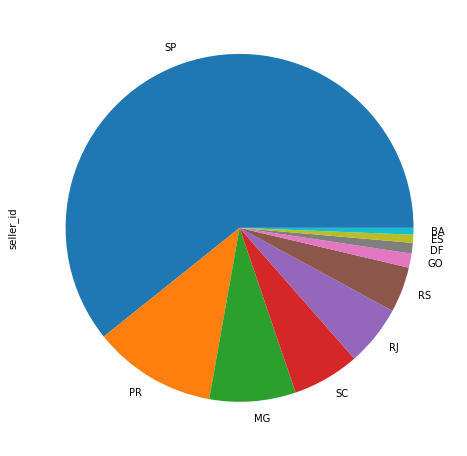

In [47]:
sellers_in_states.head(10).plot(kind='pie',figsize=(15,8))

Orders

In [11]:
df.drop_duplicates(subset=['order_id'],keep='last',inplace=True)

In [12]:
df.order_id.nunique()

98665

Text(0, 0.5, 'orders')

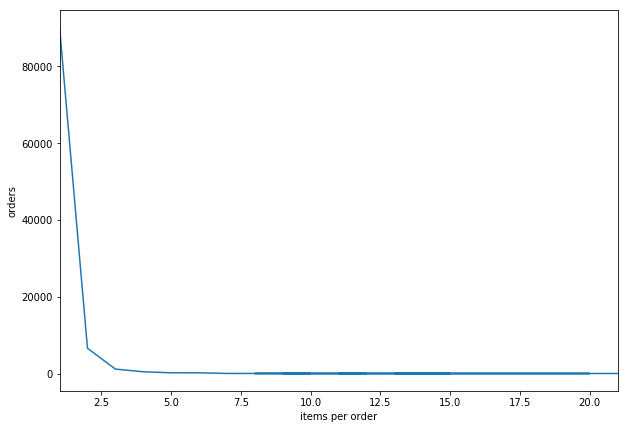

In [13]:
df.order_item_id.value_counts().plot(figsize=(10,7))
plt.xlabel('items per order')
plt.ylabel('orders')

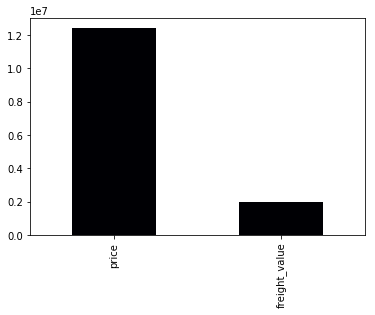

In [15]:
df.groupby('order_id')['price','freight_value'].sum().sum().round(2).plot('bar',cmap='inferno')

In [14]:
df.groupby('order_id')['price','freight_value'].sum().sum().round(2).to_frame()

,0
price,12430669.70
freight_value,1991797.63


In [16]:
df.product_id.nunique()

32126

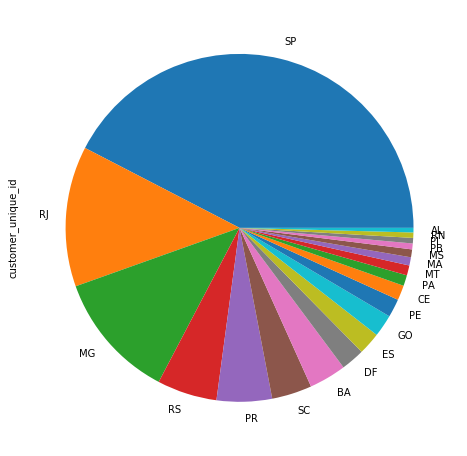

In [44]:
df.groupby('customer_state')['customer_unique_id'].nunique().sort_values(ascending=False).head(20).plot(kind='pie',figsize=(12,8))

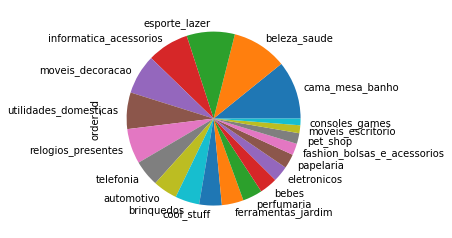

In [49]:
df.groupby('product_category_name')['order_id'].nunique().sort_values(ascending=False).head(20).plot(kind='pie')

In [69]:
df.groupby('payment_type')['payment_value'].sum().round(2).to_frame()

,payment_value
payment_type,
boleto,2842240.16
credit_card,12310049.88
debit_card,215079.53
voucher,216183.21


In [67]:
df.groupby('payment_type')['order_id'].count().to_frame()

,order_id
payment_type,
boleto,19614
credit_card,74731
debit_card,1521
voucher,2799


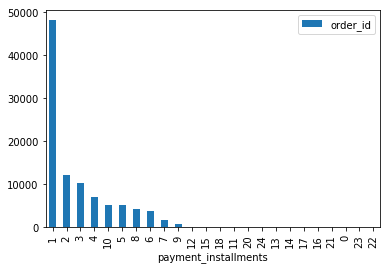

In [80]:
df.groupby('payment_installments')['order_id'].count().sort_values(ascending=False).to_frame().plot(kind='bar')

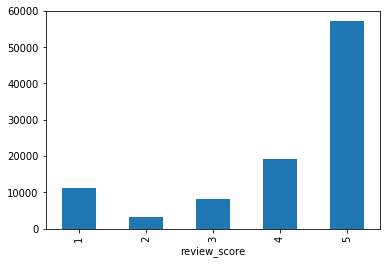

In [81]:
df.groupby('review_score').order_id.count().plot('bar')

In [87]:
df.groupby('order_status')['order_id'].nunique().sort_values(ascending=False).to_frame()


,order_id
order_status,
delivered,96477
shipped,1106
canceled,461
invoiced,312
processing,301
unavailable,6
approved,2


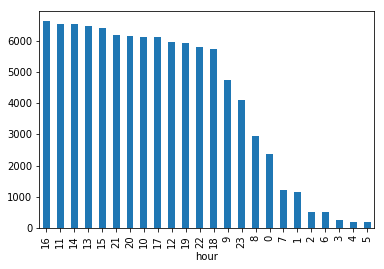

In [96]:
df['order_purchase_timestamp']=pd.to_datetime(df['order_purchase_timestamp'])
df['order_delivered_customer_date']=pd.to_datetime(df['order_delivered_customer_date'])
df['weekday']=df['order_purchase_timestamp'].dt.weekday_name
df['year']=df['order_purchase_timestamp'].dt.year
df['monthday']=df['order_purchase_timestamp'].dt.day
df['weekday'] = df['order_purchase_timestamp'].dt.weekday
df['month']=df['order_purchase_timestamp'].dt.month
df['hour']=df['order_purchase_timestamp'].dt.hour
trend_hour=df.groupby('hour').agg('order_id').count().sort_values(ascending=False)
trend_hour.plot(kind='bar')
#pd.to_datetime(trend_hour, infer_datetime_format=True)
#cats = ['12 AM', '01 AM', '02 AM', '03 AM', '04 AM', '05 AM', '06 AM', '07 AM', '08 AM', '09 AM', '10 AM', '11 AM', '12 PM', '01 PM', '02 PM', '03 PM', '04 PM', '05 PM', '06 PM', '07 PM', '08 PM', '09 PM', '10 PM', '11 PM']
#dates = pd.Categorical(trend_hour.starttime.dt.strftime('%I %p'), categories=cats, ordered=True)
#temp = pd.crosstab(dates, trend_hour)
#print (temp)


In [97]:
trend_year=pd.DataFrame(df.groupby('year')['price'].sum().sort_values(ascending=False).round(2))

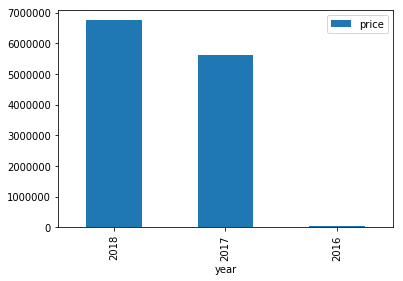

In [98]:
trend_year.plot(kind='bar')

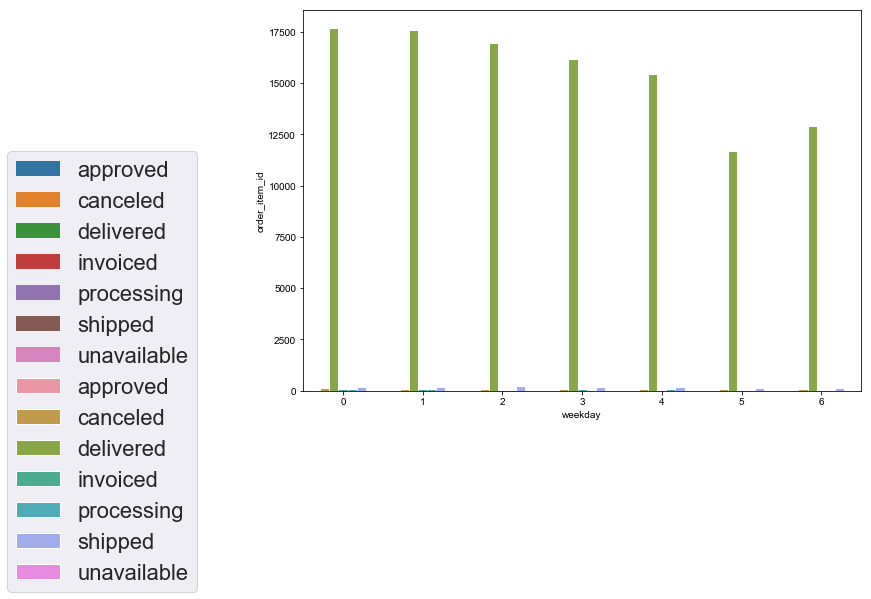

In [100]:
usual_week=df.groupby(['weekday','order_status']).sum().order_item_id
df_usual_week=pd.DataFrame(usual_week).reset_index()
plt.figure(figsize=(10,7))
sns.barplot(data=df_usual_week,x='weekday',y='order_item_id',hue='order_status')
sns.set(font_scale=2,palette='viridis')
sns.barplot(data=df_usual_week,x='weekday',y='order_item_id',hue='order_status').legend(loc='center left', bbox_to_anchor=(-.55, 0.05), ncol=1)
